In [22]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [23]:
import pandas as pd
reviewdata=pd.read_csv("train.csv")

In [24]:
reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
reviewdata.shape

(38932, 5)

In [5]:
reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
User_ID         38932 non-null object
Description     38932 non-null object
Browser_Used    38932 non-null object
Device_Used     38932 non-null object
Is_Response     38932 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


In [6]:
reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id47709,1
Description,38932,38932,The W Hotel Hollywood is located in picturesqu...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [7]:
Totalmissingvalues=reviewdata.isnull().sum().sort_values(ascending=False)
Percentage=((reviewdata.isnull().sum()/len(reviewdata)*100)).sort_values(ascending=False)
missing_data=pd.concat([Totalmissingvalues,Percentage],axis=1,keys=["Totalmissingvalues","Percentage"])
missing_data


,Totalmissingvalues,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


In [8]:
print("percentage for default/n")
print(round(reviewdata.Is_Response.value_counts(normalize=True)*100,2))

percentage for default/n
happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


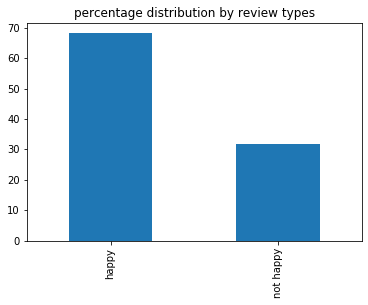

In [9]:
round(reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind="bar")
plt.title("percentage distribution by review types")
plt.show()

In [10]:
reviewdata.drop(columns=["User_ID","Browser_Used","Device_Used"],inplace=True)

In [11]:
def text_clean_1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text
cleaned1=lambda x:text_clean_1(x)

In [12]:
reviewdata['cleaned_description']=pd.DataFrame(reviewdata.Description.apply(cleaned1))
reviewdata.head()

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


In [16]:
Independent_var=reviewdata.cleaned_description
Dependent_var=reviewdata.Is_Response
IV_train,IV_test,DV_train,DV_test=train_test_split(Independent_var,Dependent_var,test_size=0.1,random_state=225)
print("IV_train:",len(IV_train))
print("IV_test:",len(IV_test))
print("DV_train:",len(DV_train))
print("DV_test:",len(DV_test))


IV_train: 35038
IV_test: 3894
DV_train: 35038
DV_test: 3894


In [26]:
tvec=TfidfVectorizer()
clf2=LogisticRegression(solver ="lbfgs")
model=Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train,DV_train)
predictions=model.predict(IV_test)
confusion_matrix(predictions,DV_test)



array([[2420,  297],
       [ 151, 1026]], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy :",accuracy_score(predictions,DV_test))
print("Precision:",precision_score(predictions,DV_test,average="weighted"))
print("Recall:",recall_score(predictions,DV_test,average="weighted"))

Accuracy : 0.8849512069851053
Precision: 0.8911660597365276
Recall: 0.8849512069851053


In [40]:
example=["Visited Seattle on business. Spent - nights in the Vintage Park. Great location. Room was nice. Bathroom was nice and clean. Thermostat didn't work-had to open the windows to cool the room off. Upon check-in, they asked if I wanted turn-down service. I said yes. Never happened. Asked front desk for a local Seattle restaurant on my first night. She suggested two cookie-cutter wine bars and a mall restaurant. Not a big deal, but as I became familiar with downtown Seattle, I couldn't believe she didn't recommend The Brooklyn or one of the many other restaurants with true local flavor. Joined the Kimpton loyalty club upon arriving. Was supposed to get the WSJ. Never even received USA Today. But I did get free internet, which saved me some money. No pool. I knew this before I made the reservation, but it was not immediately clear--had to do some searching."]
result=model.predict(example)
result


array(['not happy'], dtype=object)